In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv('/data.csv', parse_dates =['date'], dayfirst=True, index_col='date', sep=';').dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2018-01-31 to 2023-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tax     72 non-null     object
dtypes: object(1)
memory usage: 1.1+ KB


In [11]:
df['tax'] = df['tax'].astype(str).str.replace(',', '.').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2018-01-31 to 2023-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tax     72 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


In [12]:
df

,tax
date,
2018-01-31,1.6
2018-02-28,2.7
2018-03-31,2.7
2018-04-30,2.7
2018-05-31,2.3
...,...
2023-08-31,4.2
2023-09-30,4.2
2023-10-31,4.0


<Axes: xlabel='date'>

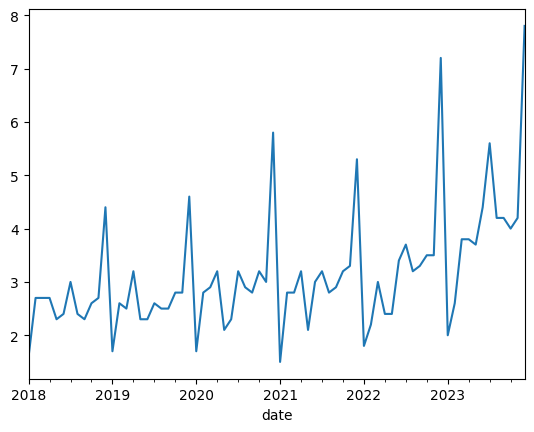

In [ ]:
df.plot(legend=False)

In [15]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
adfuller(df)

(np.float64(4.391181508500229),
 1.0,
 11,
 60,
 {'1%': np.float64(-3.5443688564814813),
  '5%': np.float64(-2.9110731481481484),
  '10%': np.float64(-2.5931902777777776)},
 np.float64(93.42533708237713))

Ряд не стационарный.

In [ ]:
adfuller(df.diff(1).dropna())

(np.float64(-1.761697259349529),
 np.float64(0.3996368079678089),
 12,
 58,
 {'1%': np.float64(-3.548493559596539),
  '5%': np.float64(-2.912836594776334),
  '10%': np.float64(-2.594129155766944)},
 np.float64(88.10330289391928))

Первая разность также не стационарна.

In [ ]:
adfuller(df.diff(1).diff(1).dropna())

(np.float64(-9.672015186988594),
 np.float64(1.2694831709352473e-16),
 11,
 58,
 {'1%': np.float64(-3.548493559596539),
  '5%': np.float64(-2.912836594776334),
  '10%': np.float64(-2.594129155766944)},
 np.float64(90.05654310464479))

Вторая разность стационарная. Ряд второго порядка интегрируемости.

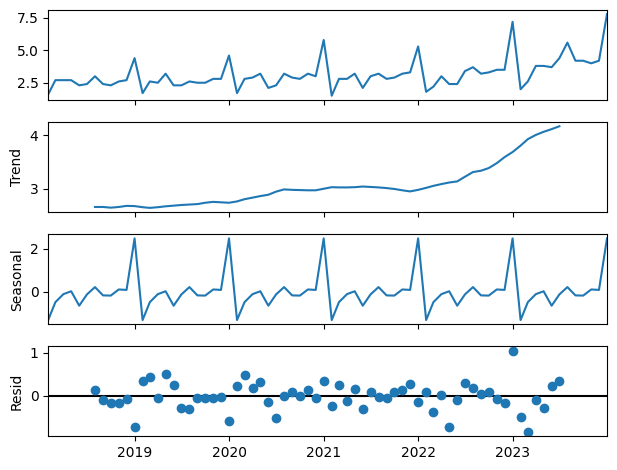

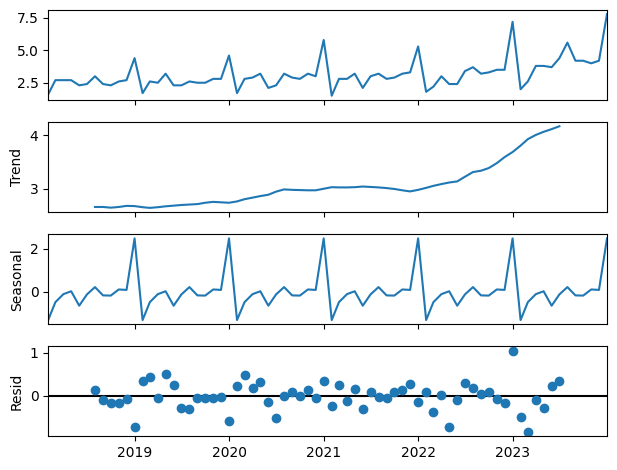

In [ ]:
seasonal_decompose(df, period=12).plot()

Присутсвует сезонность.

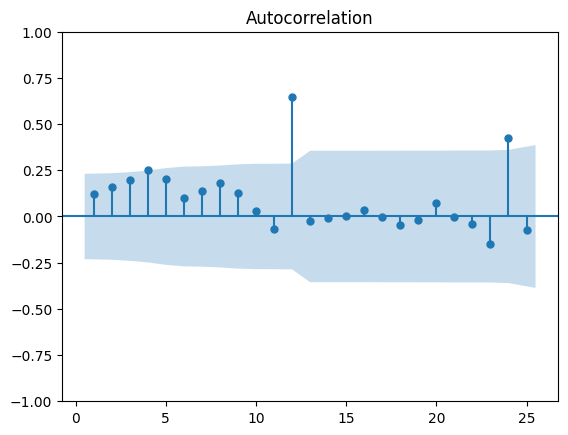

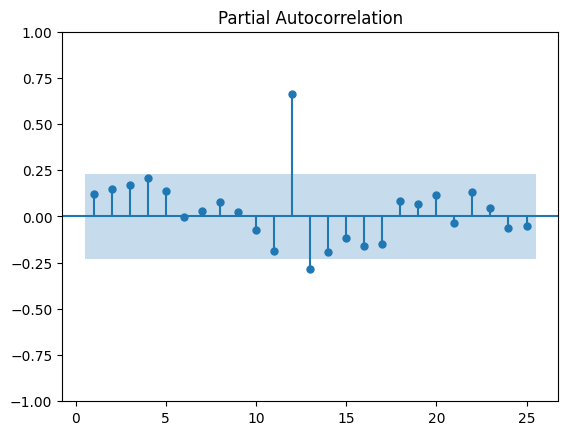

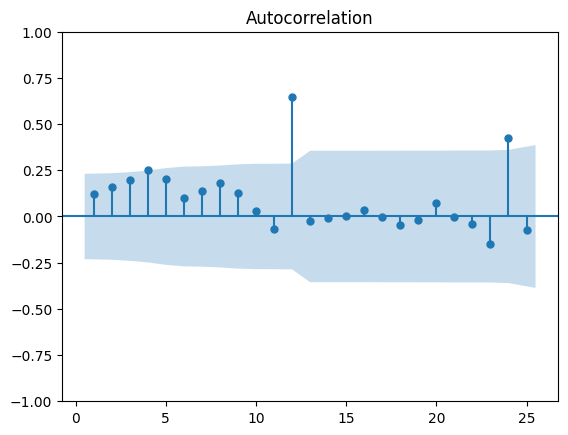

In [ ]:
plot_pacf(df, zero=False,lags=25)
plot_acf(df, zero=False, lags=25)

Сезонность раз в год. 12 лаг.

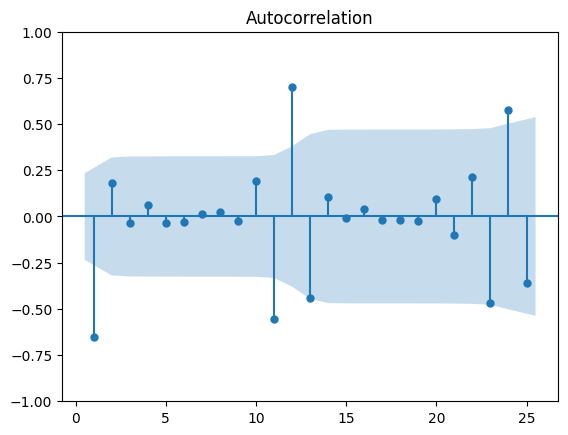

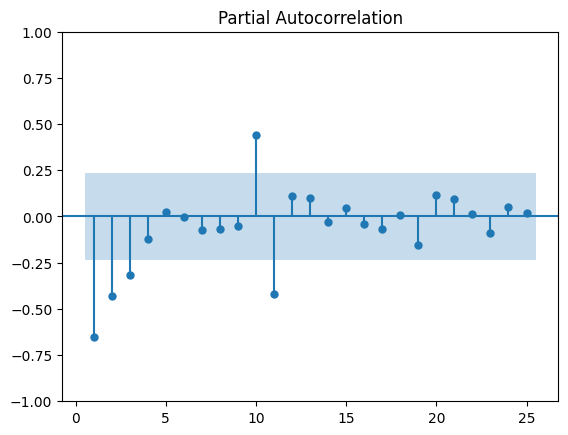

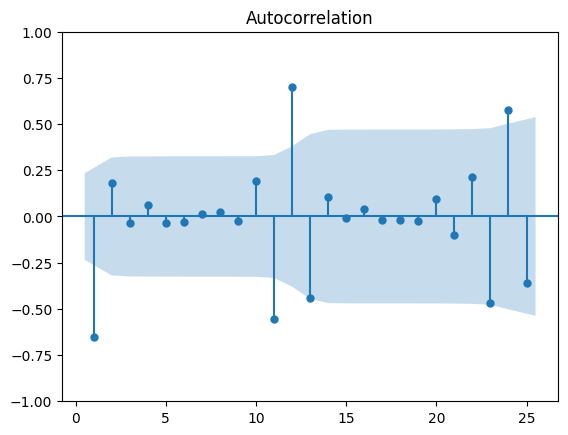

In [ ]:
plot_pacf(df.diff(1).diff(1).dropna(), zero=False,lags=25)
plot_acf(df.diff(1).diff(1).dropna(), zero=False, lags=25)

In [1]:
   !pip install --upgrade pip
   !pip install numpy==1.23.5

In [3]:
   !find /usr/local/lib/python* -maxdepth 2 -type d -name "pmdarima*"

In [4]:
   !rm -rf /usr/local/lib/python3.11/dist-packages/pmdarima*

In [5]:
   !pip install --no-cache-dir pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 44.0 MB/s eta 0:00:00


In [6]:
   import numpy as np
   import pmdarima as pm
   print(np.__version__, pm.__version__)

1.23.5 2.0.4


In [13]:
results = pm.auto_arima( df,             # data
                         d=2,            # non-seasonal difference order
                         start_p=3,      # initial guess for p
                         start_q=0,      # initial guess for q
                         max_p=11,        # max value of p to test
                         max_q=3,        # max value of q to test
                         seasonal=True,  # is the time series seasonal
                         m=12,            # the seasonal period
                         D=1,            # seasonal difference order
                         start_P=1,      # initial guess for P
                         start_Q=0,      # initial guess for Q
                         max_P=10,        # max value of P to test
                         max_Q=10,        # max value of Q to test
                         information_criterion='aic', # used to select best model
                         trace=True,             # print results whilst training
                         error_action='ignore',  # ignore orders that don't work
                         stepwise=True          # apply intelligent order search
                       )

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(3,2,0)(1,1,0)[12]             : AIC=107.005, Time=0.30 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=169.607, Time=0.04 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=125.238, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.49 sec
 ARIMA(3,2,0)(0,1,0)[12]             : AIC=106.424, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,0)(0,1,1)[12]             : AIC=107.439, Time=0.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,0)(1,1,1)[12]             : AIC=107.257, Time=0.81 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=117.933, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,0)(0,1,0)[12]             : AIC=97.050, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,0)(1,1,0)[12]             : AIC=98.890, Time=0.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,0)(0,1,1)[12]             : AIC=98.951, Time=0.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,0)(1,1,1)[12]             : AIC=inf, Time=1.89 sec
 ARIMA(5,2,0)(0,1,0)[12]             : AIC=97.904, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,1)(0,1,0)[12]             : AIC=inf, Time=0.64 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,1)(0,1,0)[12]             : AIC=inf, Time=0.46 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,1)(0,1,0)[12]             : AIC=inf, Time=2.69 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,0)(0,1,0)[12] intercept   : AIC=99.003, Time=0.49 sec

Best model:  ARIMA(4,2,0)(0,1,0)[12]          
Total fit time: 9.356 seconds


In [16]:
model = SARIMAX(df, order=(4,2,0), seasonal_order=(0,1,0,12))
results = model.fit()
results.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                tax   No. Observations:                   72
Model:             SARIMAX(4, 2, 0)x(0, 1, 0, 12)   Log Likelihood                 -43.525
Date:                            Thu, 29 May 2025   AIC                             97.050
Time:                                    16:04:14   BIC                            107.352
Sample:                                01-31-2018   HQIC                           101.063
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4169      0.110    -12.859      0.000      -1.633      -1.201
ar.L2         -1.2570      0.214     -5.869      0.000      -1.677      -0.837
ar.L3         -0.9822      0.204     -4.815      0.000      -1.382      -0.582
ar.L4         -0.4244      0.114     -3.725      0.000      -0.648      -0.201
sigma2         0.2509      0.040      6.267      0.000       0.172       0.329
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                 6.78
Prob(Q):                              0.54   Prob(JB):                         0.03
Heteroskedasticity (H):               3.72   Skew:                             0.65
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

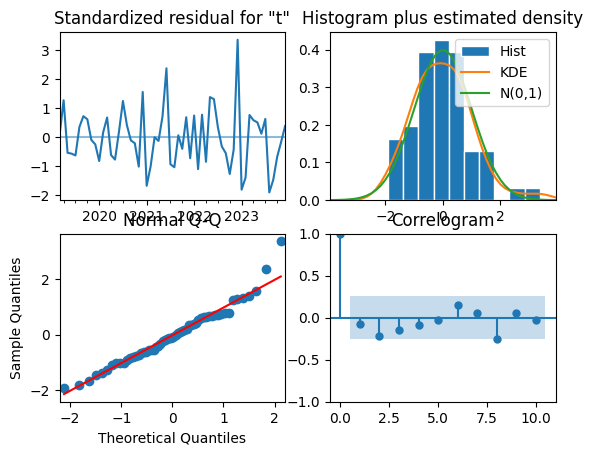

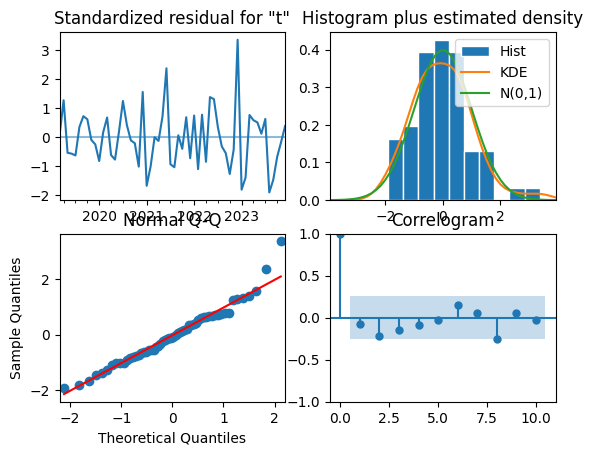

In [17]:
results.plot_diagnostics()

In [18]:
def change_neg(c):
    if c<0:
        c=0
    return round(c,1)

In [19]:
forecast=results.get_prediction(start=-12, end=len(df)+11)
predicted_mean=forecast.predicted_mean.apply(change_neg).round(1)
confidence_intervals = forecast.conf_int()
for column in confidence_intervals.columns:
    confidence_intervals[column] = confidence_intervals[column].apply(change_neg).round(1)

confidence_intervals

,lower tax,upper tax
2023-01-31,1.9,3.9
2023-02-28,2.3,4.3
2023-03-31,2.4,4.4
2023-04-30,2.5,4.5
2023-05-31,2.5,4.4
2023-06-30,3.4,5.3
2023-07-31,4.3,6.3
2023-08-31,4.2,6.1
2023-09-30,4.0,5.9
2023-10-31,3.4,5.3


In [20]:
predicted_mean

,predicted_mean
2023-01-31,2.9
2023-02-28,3.3
2023-03-31,3.4
2023-04-30,3.5
2023-05-31,3.4
2023-06-30,4.3
2023-07-31,5.3
2023-08-31,5.2
2023-09-30,4.9
2023-10-31,4.3


In [21]:
lower_limits = confidence_intervals.iloc[:, 0]
upper_limits = confidence_intervals.iloc[:, 1]

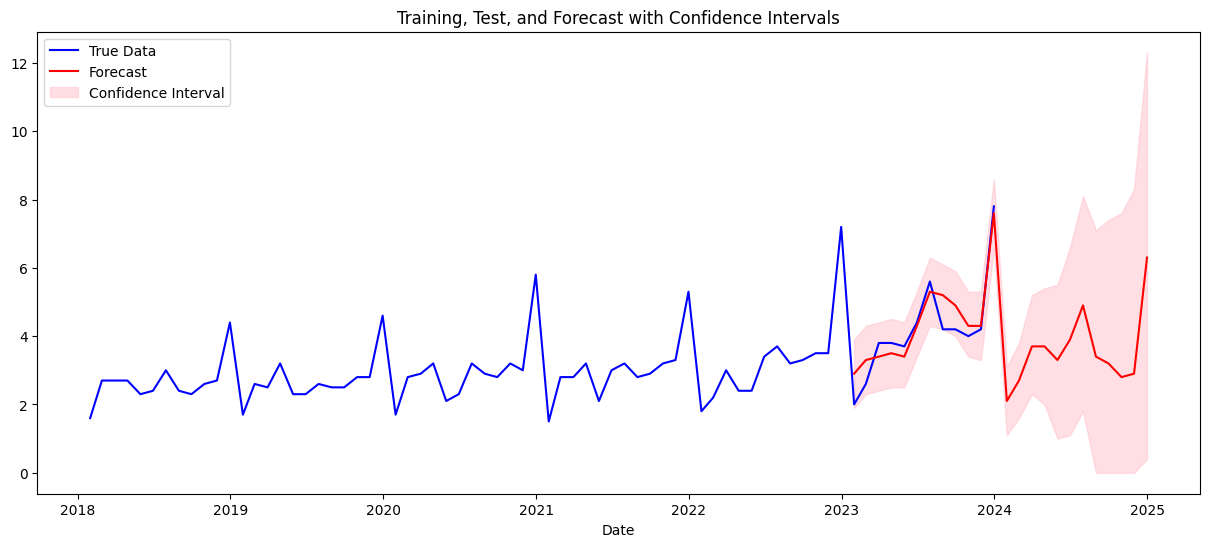

In [22]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['tax'], color='blue', label='True Data')
plt.plot(predicted_mean.index, predicted_mean, color='red', label='Forecast')

plt.fill_between(predicted_mean.index, lower_limits, upper_limits, color='pink', alpha=0.5, label='Confidence Interval')

# Add labels and title
plt.xlabel('Date')
plt.title('Training, Test, and Forecast with Confidence Intervals')

# Show legend
plt.legend()
plt.show()